# Data Preprocessing

In [1]:
# Import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import helper
import importlib
_ = importlib.reload(helper)


Let's read the data into a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) so that we can begin to understand it.

*Note, we'll set `error_bad_lines=False` when reading the file in as there appear to be a very small number of records which would create a problem otherwise.*

In [2]:
dataset_name = 'book-crossing'
data_folder = f'data/{dataset_name}'


In [3]:
df_interactions = pd.read_csv(
    f'{data_folder}/BX-Book-Ratings.csv', 
    quotechar='"',
    escapechar='\\',
    sep=';',
    encoding="ISO-8859-1",
    header=0,
)
df_interactions.head()


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Contains the book rating information. Ratings (`Book-Rating`) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [6]:
df_interactions = df_interactions.rename(columns={'User-ID':'USER_ID', 'ISBN':'ITEM_ID', 'Book-Rating':'RATING'})
df_interactions

,USER_ID,ITEM_ID,RATING
0,276725,034545104X,1.0
1,276726,0155061224,3.0
2,276727,0446520802,1.0
3,276729,052165615X,2.2
4,276729,0521795028,3.4
...,...,...,...
1149775,276704,1563526298,4.6
1149776,276706,0679447156,1.0
1149777,276709,0515107662,5.0
1149778,276721,0590442449,5.0


In [7]:
df_scaled = helper.scale_minmax(df_interactions, 'RATING', 1, 5)
df_interactions['RATING'] = df_scaled
df_interactions



,USER_ID,ITEM_ID,RATING
0,276725,034545104X,1.0
1,276726,0155061224,3.0
2,276727,0446520802,1.0
3,276729,052165615X,2.2
4,276729,0521795028,3.4
...,...,...,...
1149775,276704,1563526298,4.6
1149776,276706,0679447156,1.0
1149777,276709,0515107662,5.0
1149778,276721,0590442449,5.0


In [8]:
helper.put_csv(df_interactions, dataset_name, "interactions.csv.gz")


In [9]:
df_users = pd.read_csv(
    f'{data_folder}/BX-Users.csv', 
    quotechar='"',
    escapechar='\\',
    sep=';',
    encoding="ISO-8859-1",
    header=0,
)
df_users.head()


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
df_users = df_users.rename(columns={'User-ID':'USER_ID'})
df_users


,USER_ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [11]:
helper.put_csv(df_users, dataset_name, "users.csv.gz")


In [12]:
df_items = pd.read_csv(
    f'{data_folder}/BX-Books.csv',
    quotechar='"',
    escapechar='\\',
    sep=';',
    encoding="ISO-8859-1",
    error_bad_lines=False,
    header=0,
)
df_items.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [13]:
df_items = df_items.rename(columns={'ISBN':'ITEM_ID'})
df_items


,ITEM_ID,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271375,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271377,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [14]:
helper.put_csv(df_items, dataset_name, "items.csv.gz")


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


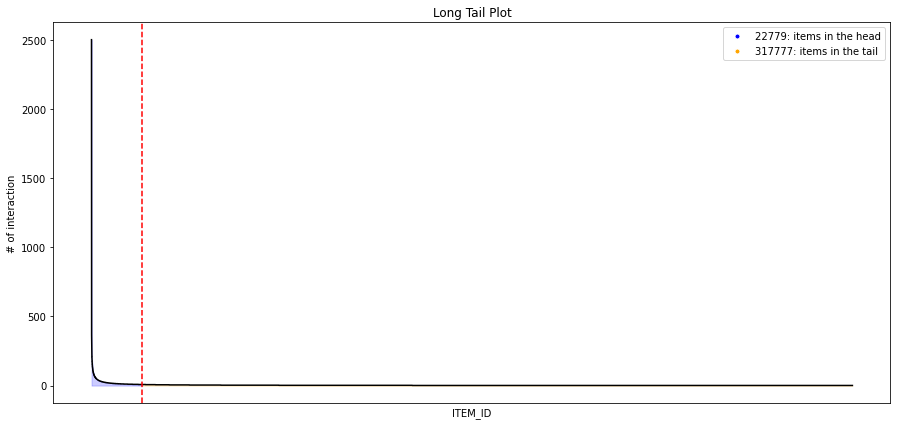

In [15]:
helper.draw_long_tail(df_interactions, "ITEM_ID")


In [59]:
quantiles = [0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.98, 0.99, 1]
users = df_interactions['USER_ID'].value_counts()
items = df_interactions['ITEM_ID'].value_counts()


In [60]:
helper.draw_quantile(df_interactions, 'USER_ID', quantiles=quantiles)


alt.Chart(...)

In [61]:
df_qntl = helper.calculate_quantile(df_interactions, 'USER_ID', quantiles=quantiles)
df_qntl.T


%,0.00,0.01,0.02,0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.95,0.98,0.99,1.00
USER_ID,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,5.0,12.0,29.0,85.0,174.0,13602.0


As we can see, only about 20% of users have rated 5 or more items.

In [62]:
helper.draw_quantile(df_interactions, 'ITEM_ID', quantiles=quantiles)


alt.Chart(...)

In [63]:
df_qntl = helper.calculate_quantile(df_interactions, 'ITEM_ID', quantiles=quantiles)
df_qntl.T


%,0.00,0.01,0.02,0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.95,0.98,0.99,1.00
ITEM_ID,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,6.0,10.0,21.0,36.0,2502.0


As we can see, only about 10% of items have been rated by 6 users.

### Clean

Let's filter out this long tail.

In [64]:
users = users[users >= 5]
items = items[items >= 6]


In [65]:
df_interactions_reduced = df_interactions.merge(pd.DataFrame({'USER_ID': users.index})).merge(pd.DataFrame({'ITEM_ID': items.index}))
df_interactions_reduced


,USER_ID,ITEM_ID,RATING
0,276746,0425115801,0.0
1,277427,0425115801,0.0
2,1660,0425115801,0.0
3,2288,0425115801,5.0
4,4938,0425115801,4.5
...,...,...,...
582560,255218,044022750X,0.0
582561,241198,3442720001,3.5
582562,252846,1569753210,4.5
582563,261379,9728436440,3.5


  FutureWarning



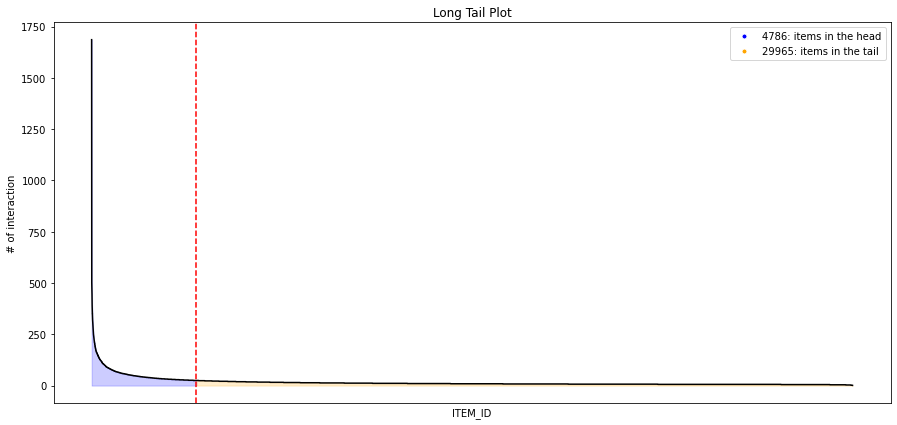

In [66]:
helper.draw_long_tail(df_interactions_reduced, "ITEM_ID")


Now, we'll recreate our customer and product lists since there are customers with more than 5 reviews, but all of their reviews are on products with less than 5 reviews (and vice versa).

In [67]:
helper.draw_quantile(df_interactions_reduced, 'USER_ID', quantiles=quantiles)


alt.Chart(...)

In [68]:
df_qntl = helper.calculate_quantile(df_interactions_reduced, 'USER_ID', quantiles=quantiles)
df_qntl.T


%,0.00,0.01,0.02,0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.95,0.98,0.99,1.00
USER_ID,1.0,1.0,1.0,1.0,2.0,4.0,5.0,6.0,7.0,9.0,13.0,22.0,47.0,97.0,216.1,362.0,7208.0


In [69]:
helper.draw_quantile(df_interactions_reduced, 'ITEM_ID', quantiles=quantiles)


alt.Chart(...)

In [70]:
df_qntl = helper.calculate_quantile(df_interactions_reduced, 'ITEM_ID', quantiles=quantiles)
df_qntl.T


%,0.00,0.01,0.02,0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.95,0.98,0.99,1.00
ITEM_ID,1.0,4.0,4.0,5.0,6.0,6.0,7.0,8.0,9.0,11.0,13.0,19.0,32.0,52.0,90.0,133.0,1686.0


In [71]:
helper.put_csv(df_interactions_reduced, dataset_name, "interactions_cleaned.csv.gz")



In [ ]:
%store user_index
%store item_index
%store df_train
%store df_test

In [ ]:
# Save into users.csv
df_users_unreg.to_csv(USERS_UNREG_CSV_FILE, 
             sep=',', 
             header=True, 
             encoding='latin-1',
             columns=['USER_ID'])
print('Saved to', USERS_UNREG_CSV_FILE)


In [ ]:
df_interactions_reg = df_interactions.loc[df_interactions.USER_ID.isin(df_users_reg.USER_ID)]
df_interactions_reg

In [ ]:
# Set max_userid to the maximum user_id in the ratings
max_userid = df_interactions['user_id'].drop_duplicates().max()
# Set max_movieid to the maximum movie_id in the ratings
max_movieid = df_interactions['item_id'].drop_duplicates().max()

# Process ratings dataframe for Keras Deep Learning model
# Add user_emb_id column whose values == user_id - 1
ratings['user_emb_id'] = ratings['user_id'] - 1
# Add movie_emb_id column whose values == movie_id - 1
ratings['movie_emb_id'] = ratings['movie_id'] - 1

print(len(ratings), 'ratings loaded')

In [ ]:
# Save into ratings.csv
df_interactions_reg.to_csv(INTERACT_REG_CSV_FILE, 
               sep=',', 
               header=True, 
               encoding='latin-1', 
               columns=['USER_ID', 'ITEM_ID', 'TIMESTAMP', 'event_type', 'event_value'])
print('Saved to', INTERACT_REG_CSV_FILE)

In [ ]:
df_interactions_unreg = df_interactions.loc[df_interactions.USER_ID.isin(df_users_unreg.USER_ID)]
df_interactions_unreg

In [ ]:
# Save into ratings.csv
df_interactions_unreg.to_csv(INTERACT_UNREG_CSV_FILE, 
               sep=',', 
               header=True, 
               encoding='latin-1', 
               columns=['USER_ID', 'ITEM_ID', 'TIMESTAMP', 'event_type', 'event_value'])
print('Saved to', INTERACT_UNREG_CSV_FILE)

In [ ]:
# Read the Movies File
df_items = pd.read_csv(os.path.join(RAW_DATA_DIR, ITEM_DATA_FILE), 
                    sep=',', 
                    engine='python', 
                    encoding='latin-1',
                    header=0,
                    names=['ITEM_ID', 'desc', 'TIMESTAMP', 'client_status'])

df_items = df_items.fillna(method='bfill')
df_items.TIMESTAMP = df_items.TIMESTAMP.astype('int32')
df_items

In [ ]:
print(len(df_items), 'descriptions of item loaded.')

In [ ]:
# Save into movies.csv
df_items.to_csv(ITEMS_CSV_FILE, 
              sep=',', 
              header=True, 
              columns=['ITEM_ID'])
print('Saved to', ITEMS_CSV_FILE)